In [1]:
#Chain in LangGraph

In [52]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [53]:
from langchain_core.messages import HumanMessage,AIMessage

messages=[AIMessage(content="Hello! How can I assist you today?"),
          HumanMessage(content="Can you tell me a joke?")]

messages.append(AIMessage(content="Sure! Why don't scientists trust atoms? Because they make up everything!"))

for message in messages:
    print(f"{message.type}: {message.content}")

ai: Hello! How can I assist you today?
human: Can you tell me a joke?
ai: Sure! Why don't scientists trust atoms? Because they make up everything!


In [54]:
from langchain_groq   import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-20b")
llm.invoke("hi")


AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "hi". We should respond politely. Probably just greet.'}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 72, 'total_tokens': 108, 'completion_time': 0.032499864, 'prompt_time': 0.004642308, 'queue_time': 0.052491062, 'total_time': 0.037142172}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_b30a5b183c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--bd66de3b-4ef6-4d2f-b948-777a650ce6c9-0', usage_metadata={'input_tokens': 72, 'output_tokens': 36, 'total_tokens': 108})

In [64]:
def add(a: int, b: int) -> int:
    """
    Adds two numbers.
    Args:
        a (int): The first number.
        b (int): The second number.
    Returns:
        int: The sum of a and b.
    Example:
        add(2, 3) -> 5
    """
    return a + b

def subtract(a: int, b: int) -> int:
    """
    Subtracts b from a.
    Args:
        a (int): The number to subtract from.
        b (int): The number to subtract.
    Returns:
        int: The result of a - b.
    Example:
        subtract(5, 2) -> 3
    """
    return a - b

def multiply(a: int, b: int) -> int:
    """
    Multiplies two numbers.
    Args:
        a (int): The first number.
        b (int): The second number.
    Returns:
        int: The product of a and b.
    Example:
        multiply(4, 3) -> 12
    """
    return a * b

def divide(a: int, b: int) -> float:
    """
    Divides a by b.
    Args:
        a (int): The numerator.
        b (int): The denominator.
    Returns:
        float: The result of a / b.
    Raises:
        ZeroDivisionError: If b is zero.
    Example:
        divide(10, 2) -> 5.0
    """
    return a / b

def modulus(a: int, b: int) -> int:
    """
    Returns the remainder of a divided by b.
    Args:
        a (int): The dividend.
        b (int): The divisor.
    Returns:
        int: The remainder after division.
    Example:
        modulus(10, 3) -> 1
    """
    return a % b

def power(a: int, b: int) -> int:
    """
    Raises a to the power of b.
    Args:
        a (int): The base number.
        b (int): The exponent.
    Returns:
        int: The result of a ** b.
    Example:
        power(2, 3) -> 8
    """
    return a ** b

def floor_divide(a: int, b: int) -> int:
    """
    Performs floor division on a and b.
    Args:
        a (int): The numerator.
        b (int): The denominator.
    Returns:
        int: The result of a // b.
    Example:
        floor_divide(7, 2) -> 3
    """
    return a // b

def maximum(a: int, b: int) -> int:
    """
    Returns the maximum of a and b.
    Args:
        a (int): The first number.
        b (int): The second number.
    Returns:
        int: The larger of a and b.
    Example:
        maximum(4, 9) -> 9
    """
    return max(a, b)

def minimum(a: int, b: int) -> int:
    """
    Returns the minimum of a and b.
    Args:
        a (int): The first number.
        b (int): The second number.
    Returns:
        int: The smaller of a and b.
    Example:
        minimum(4, 9) -> 4
    """
    return min(a, b)

def average(a: int, b: int) -> float:
    """
    Returns the average of a and b.
    Args:
        a (int): The first number.
        b (int): The second number.
    Returns:
        float: The average value.
    Example:
        average(4, 8) -> 6.0
    """
    return (a + b) / 2

In [65]:
llm=llm.bind_tools([add, subtract, multiply, divide, modulus, power, floor_divide, maximum, minimum, average])

In [47]:
llm.invoke("add 2 and 3")

AIMessage(content='', additional_kwargs={'reasoning_content': 'User wants to add 2 and 3. We have a function add.', 'tool_calls': [{'id': 'fc_ff0a2bdd-577c-42fc-a87f-fea87f6a8050', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 358, 'total_tokens': 401, 'completion_time': 0.03840157, 'prompt_time': 0.023359646, 'queue_time': 0.051841354, 'total_time': 0.061761216}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_b30a5b183c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--01927564-cd7d-4a54-8c29-d675cd3c38bf-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'fc_ff0a2bdd-577c-42fc-a87f-fea87f6a8050', 'type': 'tool_call'}], usage_metadata={'input_tokens': 358, 'output_tokens': 43, 'total_tokens': 401})

In [67]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
 
tools=[add, subtract, multiply, divide, modulus, power, floor_divide, maximum, minimum, average]

builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)

builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
"llm_tool",

tools_condition


)
builder.add_edge("tools",END)
graph=builder.compile()



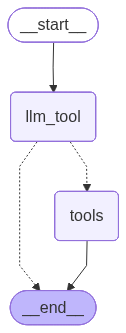

In [68]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [72]:
graph.invoke({'messages':"what is 2***2"} )

{'messages': [HumanMessage(content='what is 2***2', additional_kwargs={}, response_metadata={}, id='764c2126-a4e6-444f-a9e4-60c2f9d6004f'),
  AIMessage(content='It looks like there might be a typo in your expression. Did you mean to calculate \\(2^{3^{2}}\\) (i.e.,\u202f`2**3**2`) or something else? Let me know the exact expression you’d like evaluated, and I’ll compute it for you.', additional_kwargs={'reasoning_content': 'User asks: "what is 2***2". They probably mean 2**3**2? Actually "2***2" could be ambiguous. In many languages, "**" is exponentiation. "2***2" could be 2 ** * * 2? Maybe they meant 2**3**2? But they wrote 2***2. That could be interpreted as 2 * * * 2? Or 2^3^2? Possibly they want to compute 2**3**2. But the question is ambiguous. Could be a typo: "2***2" means 2 * 3 * 2? That\'s 12. Or maybe they want 2**3**2 = 2^(3^2)=2^9=512. Or maybe it\'s 2**3**2? But they wrote 2***2. Could be 2 * * * 2? Usually exponent operator is **. So 2***2 might be 2**3**2? Actually if y

{'message': [HumanMessage(content='2=2', additional_kwargs={}, response_metadata={}, id='d8176fbc-d88b-4d3e-b788-c153022bcef8')]}